In [1]:
import numpy as np

# Q1

In [2]:
def element_wise_comparisons(array1, array2):
    """
    Perform element-wise comparisons between two NumPy arrays.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.

    Returns:
    - tuple: A tuple of NumPy arrays containing the following element-wise comparison results:
        - greater_result (numpy.ndarray): Element-wise greater than comparison.
        - greater_equal_result (numpy.ndarray): Element-wise greater than or equal to comparison.
        - less_result (numpy.ndarray): Element-wise less than comparison.
        - less_equal_result (numpy.ndarray): Element-wise less than or equal to comparison.
    """
    
    # ------------
    greater_result = array1 > array2
    greater_equal_result = array1 >= array2
    less_result = array1 < array2
    less_equal_result = array1 <= array2
    # ------------

    return greater_result, greater_equal_result, less_result, less_equal_result

In [3]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[1, 2], [2, 3]])

greater, greater_equal, less, less_equal = element_wise_comparisons(array1, array2)

print("Greater than:")
print(greater)
print("\nGreater than or equal to:")
print(greater_equal)
print("\nLess than:")
print(less)
print("\nLess than or equal to:")
print(less_equal)

Greater than:
[[False False]
 [ True  True]]

Greater than or equal to:
[[ True  True]
 [ True  True]]

Less than:
[[False False]
 [False False]]

Less than or equal to:
[[ True  True]
 [False False]]


# Q2

In [4]:
def array_multiply(array1, array2, method="element-wise"):
    """
    Perform multiplication between two NumPy arrays using the specified method.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The multiplication method to use. Defaults to "element-wise".

    Returns:
    - numpy.ndarray: The result of the multiplication operation based on the chosen method.
    """
    # ------------
    result = np.multiply(array1, array2) if method == 'element-wise' else np.dot(array1, array2)
    # ------------

    return result

In [5]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[2, 0], [1, 2]])

# Perform element-wise multiplication
element_wise_result = array_multiply(array1, array2, method="element-wise")
print("Element-wise multiplication:")
print(element_wise_result)

# Perform matrix multiplication
matrix_multiply_result = array_multiply(array1, array2, method="matrix-multiply")
print("\nMatrix multiplication:")
print(matrix_multiply_result)

Element-wise multiplication:
[[2 0]
 [3 8]]

Matrix multiplication:
[[ 4  4]
 [10  8]]


# Q3

In [6]:
def broadcast_add(p, q, method="row-wise"):
    """
    Perform addition between two NumPy arrays using broadcasting and the specified method.

    Parameters:
    - p (numpy.ndarray): First input NumPy array.
    - q (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The addition method to use. Defaults to "row-wise".
        - "row-wise": Perform row-wise addition, broadcasting q to match the number of rows in p.
        - "column-wise": Perform column-wise addition, adding q to each column of p.

    Returns:
    - numpy.ndarray: The result of the addition operation based on the chosen method.
    
    Raises:
    - ValueError: If an invalid method is provided or if the shapes are incompatible for the chosen method.
    """
    # ------------
    if method != "row-wise" and method != 'column-wise':
        raise ValueError('method is not supported')
    try:
        if method == 'row-wise':
            q = q.reshape(1, p.shape[1])
            result = p+q
        if method == 'column-wise':
            q = q.reshape(p.shape[0], 1)
            result = p+q
    except Exception:
        raise ValueError('shapes are incompatible')
    # ------------
    
    return result

In [7]:
# Example usage with different-shaped arrays
p = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
q = np.array([10, 20, 30])

# Add q row-wise to p
row_wise_result = broadcast_add(p, q, method="row-wise")
print("Row-wise addition:")
print(row_wise_result)

# Add q column-wise to p
column_wise_result = broadcast_add(p, q, method="column-wise")
print("\nColumn-wise addition:")
print(column_wise_result)

Row-wise addition:
[[11 22 33]
 [14 25 36]
 [17 28 39]]

Column-wise addition:
[[11 12 13]
 [24 25 26]
 [37 38 39]]


# Q4

In [8]:
# Initialize the random matrix
x = np.random.randint(1, 11, (4, 4))

print("Original Array:")
print(x)

# Do the normalization
x = x - x.min()
x = x / x.max()

print("After normalization:")
print(x)

Original Array:
[[ 1  6  5 10]
 [ 2 10  2  3]
 [ 8  7  6 10]
 [ 1  2  8 10]]
After normalization:
[[0.         0.55555556 0.44444444 1.        ]
 [0.11111111 1.         0.11111111 0.22222222]
 [0.77777778 0.66666667 0.55555556 1.        ]
 [0.         0.11111111 0.77777778 1.        ]]


# Q5

query1:
Daily return for first 10 days starting from day 2: [-0.00214496  0.0139108   0.01088372 -0.02410892  0.01351761 -0.00015861
 -0.0078813   0.00847409 -0.01376749 -0.00311912]
query2:
average daily return = 0.0005548260008486608
query3:
standard deviation = 0.009442945103460247


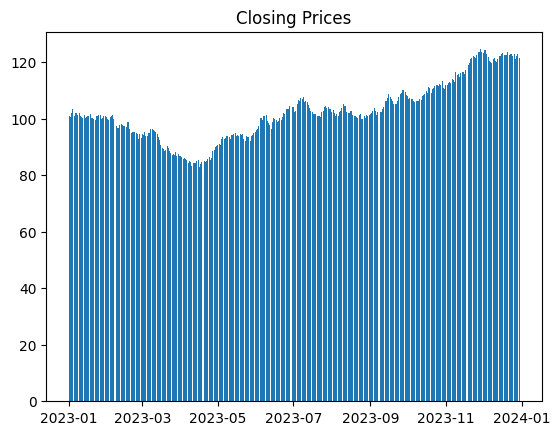

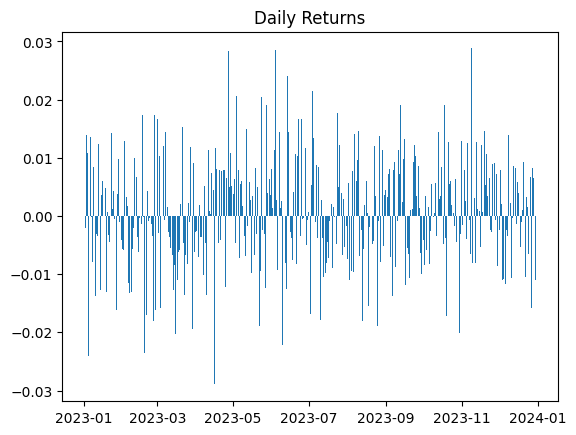

query6:
best_day='11/9/2023' return =0.02878633838810639
worst_day='4/16/2023' return = -0.028963574613605738
query7:
best_price_date='11/29/2023' price = 124.6180108
worst_price_date='4/16/2023' price = 82.96821012


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# You should write your code here and print or plot the required data asked in homework documentation
df = pd.read_csv('data.csv')
cp = df['Closing Price'].to_numpy()

# query1
query1 = (cp[1:] - cp[0:-1]) / cp[0:-1]
print(f'query1:\nDaily return for first 10 days starting from day 2: {query1[:10]}')

# query2
query2 = query1.mean()
print(f'query2:\naverage daily return = {query2}')

# query3
query3 = query1.std()
print(f'query3:\nstandard deviation = {query3}')

# query4
dates = df['Date']
plt.title('Closing Prices')
plt.bar([datetime.datetime.strptime(date, r'%m/%d/%Y') for date in dates], cp)
plt.show()

# query5
plt.title('Daily Returns')
plt.bar([datetime.datetime.strptime(date, r'%m/%d/%Y') for date in dates[1:]], query1)
plt.show()

# query6
best_day = dates[query1.argmax()+1]
worst_day = dates[query1.argmin()+1]
print(f'query6:\n{best_day=} return ={query1.max()}\n{worst_day=} return = {query1.min()}')

# query7
best_price_date = dates[cp.argmax()]
worst_price_date = dates[cp.argmin()]
print(f'query7:\n{best_price_date=} price = {cp.max()}\n{worst_price_date=} price = {cp.min()}')


# Q6

In [10]:
def for_loop_feed_forward(X, w):
    """
    Perform a feed-forward operation using a for loop.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    # ------------
    outputs = np.zeros((X.shape[0], 1))
    for i in range(0, X.shape[0]):
        s = 0
        for j in range(0, X.shape[1]):
            s += X[i][j] * w[j]
        outputs[i] = s
    # ------------

    return outputs

def vectorized_feed_forward(X, w):
    """
    Perform a feed-forward operation using vectorization.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    # ------------
    outputs = np.dot(X, w)
    # ------------

    return outputs

In [11]:
import time

# generate random samples

X = np.random.rand(1000, 500)
w = np.random.rand(500, 1)

start_time = time.time()
outputs = for_loop_feed_forward(X, w)

print("Time spent on calculating the outputs using for loops: ")
print(time.time() - start_time)

start_time = time.time()
outputs = vectorized_feed_forward(X, w)

print("Time spent on calculating the outputs using vectorization: ")
print(time.time() - start_time)

Time spent on calculating the outputs using for loops: 
1.6099963188171387
Time spent on calculating the outputs using vectorization: 
0.0010025501251220703


# Q7

In [12]:
def replace_elements_above_threshold(array, threshold):
    """
    Replace elements in a NumPy array that are higher than the given threshold with a specified value.

    Parameters:
    - array (numpy.ndarray): Input NumPy array.
    - threshold (float): Threshold value to compare elements with.

    Returns:
    - numpy.ndarray: NumPy array with elements replaced above the threshold.
    """
    # ------------
    modified_arr = array.copy()
    modified_arr[array > threshold] = 1
    modified_arr[array <= threshold] = 0
    # ------------

    return modified_arr

In [13]:
input_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
threshold_value = 5
result_array = replace_elements_above_threshold(input_array, threshold_value)
print(result_array)

[[0 0 0]
 [0 0 1]
 [1 1 1]]


# Q8

In [14]:
class Matrix:
    def __init__(self, matrix):
        """
        Initialize a Matrix object with a given list of lists.

        Parameters:
        - matrix (list of lists): Input list of lists representing the matrix.
        """
        # ------------
        self.values = matrix
        # ------------

    def is_equal(self, second_matrix):
        """
        Check if this Matrix object is equal to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if the matrices are equal, False otherwise.
        """
        # ------------
        if not (len(self.values) == len(second_matrix.values) and len(self.values[0]) == len(second_matrix.values[0])):
            return False
        equal = True
        for i in range(len(self.values)):
            for j in range(len(self.values[0])):
                if self.values[i][j] != second_matrix.values[i][j]:
                    equal = False
                    break
            if not equal:
                break
        return equal
        # ------------

    def is_higher_elementwise(self, second_matrix):
        """
        Check if this Matrix object has higher values element-wise compared to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - Matrix: Matrix same shape of the input.
        """
        # ------------
        result = [[True if self.values[i][j] > second_matrix.values[i][j] else False \
                         for j in range(len(self.values[0]))] for i in range(len(self.values))]
        return result
        # ------------
    
    def is_subset(self, second_matrix):
        """
        Check if this Matrix object is a subset of another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if this matrix is a subset of 'second_matrix', False otherwise.
        """
        # ------------
        selfshape = (len(self.values), len(self.values[0]))
        othershape = (len(second_matrix.values), len(second_matrix.values[0]))
        if selfshape[0] > othershape[0] or selfshape[1] > othershape[1]:
            return False

        for i in range(othershape[0]-selfshape[0] + 1):
            for j in range(othershape[1] - selfshape[1] + 1):
                if Matrix([row[j:j+selfshape[1]] for row in second_matrix.values[i:i+selfshape[0]]]).is_equal(self):
                    return True
        return False
        # ------------

    def dot_product(self, second_matrix):
        """
        Calculate the dot product between this Matrix object and another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for the dot product.

        Returns:
        - Matrix: The result of the dot product as a numpy.ndarray.
        """
        # ------------
        result = [[0 for j in range(len(second_matrix.values[0]))] for i in range(len(self.values))]

        if len(self.values[0]) != len(second_matrix.values):
            raise ValueError('matrix shapes are incompatible')
        for i in range(len(self.values)):
            for j in range(len(second_matrix.values[0])):
                row = self.values[i]
                column = [row[j] for row in second_matrix.values]
                s = 0
                for k in range(len(row)):
                    s += row[k] * column[k]
                result[i][j] = s
        return result
        # ------------

In [15]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

matrix2 = Matrix([[0, 0, 0], [4, 5, 6], [7, 8, 9]])

# test equality of matrices here and show the result #
assert matrix1.is_equal(matrix2) == False
assert matrix1.is_equal(matrix1) == True
assert matrix2.is_equal(matrix2) == True
print('Matrix.is_equal works fine!')


Matrix.is_equal works fine!


In [16]:
matrix3 = Matrix([[0, 0, 0], [10, 20, 30], [-1, 8, 10]])

# test proportion of matrices here and show the result #
assert matrix1.is_higher_elementwise(matrix2) == [[True, True, True], [False, False, False], [False, False, False]]
assert matrix1.is_higher_elementwise(matrix3) == [[True, True, True], [False, False, False], [True, False, False]]
assert matrix2.is_higher_elementwise(matrix3) == [[False, False, False], [False, False, False], [True, False, False]]
print('Matrix.is_higher_elementwise works fine!')


Matrix.is_higher_elementwise works fine!


In [17]:
matrix4 = Matrix([[5, 6], [8, 9]])
matrix5 = Matrix([[1, 2], [4, 5]])
matrix6 = Matrix([[1, 2], [3, 4]])

# test subset of matrices here and show the result #
assert matrix4.is_subset(matrix1) == True
assert matrix5.is_subset(matrix1) == True
assert matrix6.is_subset(matrix1) == False
print('Matrix.is_subset works fine!')

Matrix.is_subset works fine!


In [18]:
matrix7 = Matrix([[3, 1], [2, 4], [-1, 5]])
matrix8 = Matrix([[3, 1], [2, 4]])

# test product of matrices here and show the result #
assert matrix7.dot_product(matrix8) == [[11, 7], [14, 18], [7, 19]]
print('Matrix.dot_product works fine!')


Matrix.dot_product works fine!
